<a href="https://colab.research.google.com/github/jose-milciades/Spoon-Knife/blob/main/Taller_1%2C_2_y_3_An%C3%A1lisis_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Taller 1, 2 y 3 de an√°lisis de datos:***

1. Pregunta Smart
2. An√°lisis Univariado
3. An√°lisis Bivariado

**Soluci√≥n punto 1: Pregunta Smart.** ‚ùî

I. Describir el problema de la organizaci√≥n:


El Banco Falabella es una de las entidades financieras m√°s importantes en t√©rminos de colocaci√≥n de tarjetas de cr√©dito en Colombia. Esta entidad maneja dos tipos de clientes. El primer grupo es el grupo de clientes que frecuentan el ecosistema y son evaluados de manera batch (proceso masivo) y se genera una pre aprobaci√≥n al evaluar estos clientes por un modelo de machine learning y diferentes criterios de riesgo de cr√©dito. El segundo segmento, representa a los clientes que no han tenido ning√∫n tipo de contacto con el banco o sus aliados (ecosistema). Actualmente, el banco cuenta con un modelo de baja predicci√≥n para evaluar este segmento de clientes y su tasa de aprobaci√≥n es del 0,5% (se aprueban aproximadamente 500 tarjetas de 100.000 solicitudes evaluadas).

La baja aprobaci√≥n de este segmento est√° limitando al banco a no poder potenciar su crecimiento, rechazando posibles clientes buenos para la entidad, dejando de maximizar el potencial y generando posibles p√©rdidas reputacionales.

II. Describir c√≥mo la ciencia de datos apoyada con IA puede ayudar a resolver el reto:

La ciencia de datos apoyada por IA puede solucionar este problema al desarrollar un modelo que pueda predecir de una mejor manera el comportamiento de los clientes del segmento de espont√°neos para maximizar la aprobaci√≥n de los mismos.

El modelo a utilizar es un modelo de regresi√≥n log√≠stica que nos permita separar la poblaci√≥n entre buenos y malos clientes de acuerdo a ciertas caracter√≠sticas en com√∫n.

III. Plantear pregunta SMART:

¬øC√≥mo podemos incrementar la tasa de aprobaci√≥n de mis clientes espont√°neos en un 5% durante los pr√≥ximos 6 meses, incorporando un modelo de regresi√≥n log√≠stico de scoring crediticio?

**Soluci√≥n punto 2: An√°lisis Univariado.** ‚òù

Cargamos la base de datos que contiene 10 variables. A mayor n√∫mero de rango, la variable toma valores m√°s altos. ej rango 1 de edad significa clientes m√°s j√≥venes que el rango 2 de edad. Cuando el dato viene en 0 significa que la variable tomaba el valor nulo.

1.Edad: Rangos de edad al momento de realizar la solicitud.

2.Exp abierta: Rango de contador de experiencia en cuentas abiertas en productos financieros al momento de realizar la solicitud.

3.Exp cerrada: Rango de contador de experiencia en cuentas cerradas en productos financieros al momento de realizar la solicitud.

4.Cuotas: Rango de cuota mensual que paga el cliente en el sector financiero al momento de realizar la solicitud.

5.Tarjetas sector: Rango de cantidad de tarjetas de cr√©dito que posee el cliente en el sector al momento de hacer la solicitud.

6.Nivel riesgo: Rango de nivel de riesgo (Calificaci√≥n interna) al momento de realizar la solicitud.

7.ingresos: Rango de ingreso informado por el cliente al momento de realizar la solicitud.

8.Condiciones: Rechazo generado por la entidad al momento de realizar la solicitud.

9.mora solicitud: Mora en el sector al momento de realizar la solicitud.

10.mora sector: variable objetivo (m√°xima mora durante los 15 meses siguiente a realizar la solicitud).

In [ ]:
## importar dataset usando pandas
import pandas as pd
df=pd.read_csv("Financiera_rechazos.csv", sep=';')

In [ ]:
df.shape

(92369, 10)

In [ ]:
df.describe ()

Edad   Exp abierta   Exp cerrara        Cuotas  \
count  92369.000000  92369.000000  92369.000000  92369.000000   
mean       3.327859      1.881649      1.581570      1.712956   
std        0.998706      1.203101      1.074118      0.894324   
min        0.000000      0.000000      0.000000      0.000000   
25%        3.000000      1.000000      1.000000      1.000000   
50%        3.000000      1.000000      1.000000      2.000000   
75%        4.000000      3.000000      2.000000      2.000000   
max        5.000000      4.000000      4.000000      8.000000   

       Tarjetas Sector  Nivel riesgo      ingresos   Condiciones  \
count     92369.000000  92369.000000  92369.000000  92369.000000   
mean          1.550845      5.128701      3.498446      1.905466   
std           0.846820      1.772366      1.305784      0.319459   
min           0.000000      0.000000      0.000000      1.000000   
25%           1.000000      5.000000      3.000000      2.000000   
50%           1.000000      6.000000      3.000000      2.000000   
75%           2.000000      6.000000      4.000000      2.000000   
max           4.000000      6.000000      7.000000      4.000000   

       mora solicitud   mora sector  
count    92369.000000  92369.000000  
mean         1.255952      1.502225  
std          0.469040      0.499998  
min          0.000000      1.000000  
25%          1.000000      1.000000  
50%          1.000000      2.000000  
75%          2.000000      2.000000  
max          2.000000      2.000000

In [ ]:
df.columns

Index(['Edad', 'Exp abierta', 'Exp cerrara', 'Cuotas', 'Tarjetas Sector',
       'Nivel riesgo', 'ingresos', 'Condiciones', 'mora solicitud',
       'mora sector'],
      dtype='object')

In [ ]:
## Verifico la correlaci√≥n de cada variable con la variable predictora

df.corr()['mora sector']

Edad               0.039581
Exp abierta        0.121902
Exp cerrara        0.009515
Cuotas             0.102461
Tarjetas Sector    0.068150
Nivel riesgo       0.049167
ingresos          -0.006715
Condiciones        0.048016
mora solicitud     0.550983
mora sector        1.000000
Name: mora sector, dtype: float64

Para este ejercicio voy a escoger la variable cuotas. La variable mora solicitud tiene mejor correlaci√≥n pero esta variable puede tener problemas de causalidad con la variable objetivo dado que esa mora al momento de la solicitud puede ser la misma mora de la variable resultado a lo largo del tiempo. Para ajustar esta parte debemos separar la poblaci√≥n que no ten√≠a mora al momento de la solicitud de la poblaci√≥n que si ten√≠a mora al momento de la solicitud.

La variable cuotas puede influir de manera importante en la mora de los clientes. Al tener que pagar una cuota muy alta, el cliente puede verse en situaciones de poca liquidez, generando entrada en mora en los pagos de sus obligaciones.

In [ ]:
## Estad√≠sticas descriptivas de cuotas

df["Cuotas"].describe()

count    92369.000000
mean         1.712956
std          0.894324
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: Cuotas, dtype: float64

<Axes: >

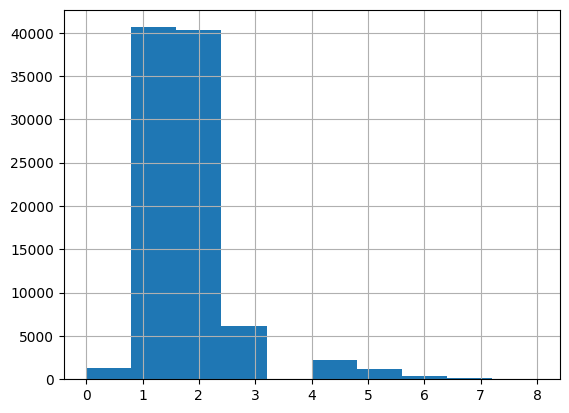

In [ ]:
## histograma cuotas

df["Cuotas"].hist()

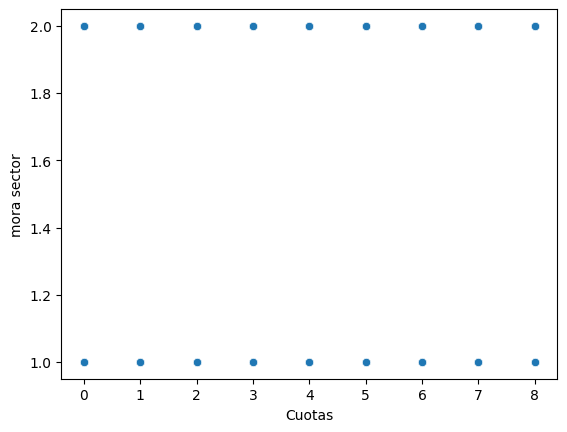

In [ ]:
## dispersi√≥n

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pathlib as pl


sns.scatterplot (x="Cuotas",y="mora sector",data=df)
plt.show()


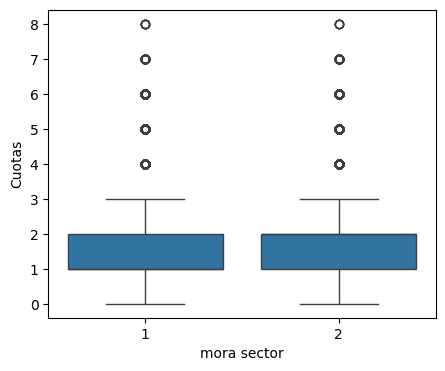

In [ ]:
## Gr√°fico de cajas y bigotes

plt.figure(figsize=(5,4))
sns.boxplot(x='mora sector',y='Cuotas',data=df)
plt.show()


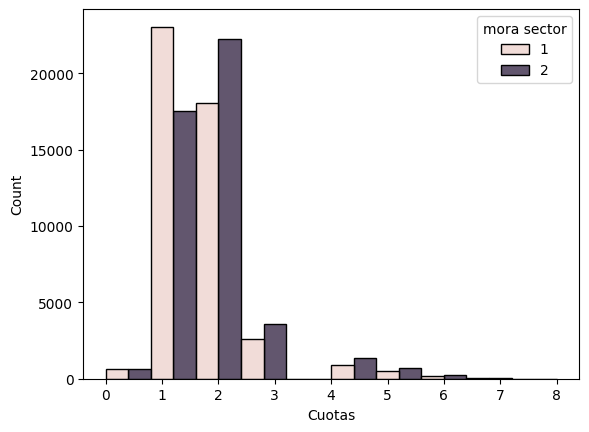

In [ ]:
## Histograma comparativo

sns.histplot(df, x="Cuotas", hue="mora sector", multiple="dodge",bins = 10)
plt.show()

In [ ]:
### Frecuencias cruzadas
pd.crosstab(df["mora sector"],df["Cuotas"])

Cuotas         0      1      2     3     4    5    6   7  8
mora sector                                                
1            642  23057  18061  2580   882  523  178  50  6
2            613  17568  22233  3595  1377  717  229  54  4

***Interpretaci√≥n de resultados***

A pesar de tener la segunda correlaci√≥n m√°s alta, usar como √∫nica variable las cuotas en t√©rminos de rangos, no discriminan el desempe√±o futuro del cliente.

En el gr√°fico de dispersi√≥n se evidencia que no existe alg√∫n tipo de relaci√≥n lineal entre las variables cuotas y mora sector. Esto quiere decir que el nivel de cuotas no determina el desempe√±o del cliente en el sector.

Lo que podemos observar al usar el gr√°fico de cajas y bigotes es que para ambos grupos de mora sector, la distribuci√≥n de cuotas es similar. En ambos casos tenemos presencia de outliers y la mediana est√° entre 1 y 2 en ambos casos. Esto nos dice que no hay diferencia clara entre quienes caen en mora y los que no con base en las cuotas.

En el histograma comparativo los valores que toma mora sector siguen casi la misma distribuci√≥n.

***Conclusiones***

Al realizar un r√°pido analisis con diferentes herramientas, evidenciamos que utilizando como variable explicativa solo la variable cuotas, no logramos determinar alg√∫n tipo de relaci√≥n entre esta y el desempe√±o futuro de los clientes. El pagar cuotas altas o cuotas bajas no determina el comportamiento del cliente.

Al determinar que la variable resultado toma valores categ√≥ricos entre 1 y 2 donde 1 es que el cliente no cae en mora y 2 es que el cliente si cae en mora, podemos pensar en aplicar un modelo de regresi√≥n log√≠stico que nos ayudar√° a verificar la capacidad predictiva de la variable.

**Soluci√≥n punto 3: An√°lisis Bivariado.** ü§û

In [ ]:
## recordamos las correlaciones de variables con variable objetivo

df.corr()['mora sector']

Edad               0.039581
Exp abierta        0.121902
Exp cerrara        0.009515
Cuotas             0.102461
Tarjetas Sector    0.068150
Nivel riesgo       0.049167
ingresos          -0.006715
Condiciones        0.048016
mora solicitud     0.550983
mora sector        1.000000
Name: mora sector, dtype: float64

Para este an√°lisis bivariado, he decidido trabajar con las variables exp abierta y tarjetas en el sector. Por conocimiento del dominio, podemos asumir que un cliente con mayor experiencia en tenencia de cuentas abiertas con el sector y que adem√°s posea un mayor n√∫mero de tarjetas suele desempe√±arse de una mejor manera en comparaci√≥n a clientes con poca experiencia o poco manejo de productos financieros.

In [ ]:
### Frecuencias cruzadas
pd.crosstab([df["mora sector"],df["Exp abierta"]],df["Tarjetas Sector"])


Tarjetas Sector            0      1     2     3    4
mora sector Exp abierta                             
1           0            642      0     0     0    0
            1              0  25601  2575   473   24
            2              0   1936  2574  1407  163
            3              0    903  1261  1058  204
            4              0   1364  2515  2507  772
2           0            613      0     0     0    0
            1              0  20039  2344   606   41
            2              0   2622  2918  1772  232
            3              0   1439  1667  1426  335
            4              0   2784  3589  3007  956

In [ ]:
## Correlaciones

Variables = ["Exp abierta","Tarjetas Sector","mora sector"]
correlaciones = df[Variables].corr()

print (correlaciones)

                 Exp abierta  Tarjetas Sector  mora sector
Exp abierta         1.000000         0.588753     0.121902
Tarjetas Sector     0.588753         1.000000     0.068150
mora sector         0.121902         0.068150     1.000000


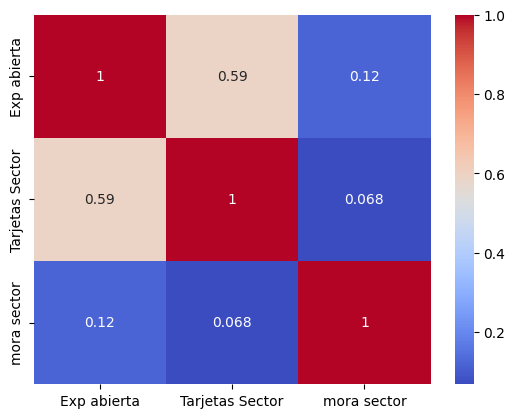

In [ ]:
## Correlaciones en gr√°fico

sns.heatmap(correlaciones,annot=True,cmap="coolwarm")
plt.show()

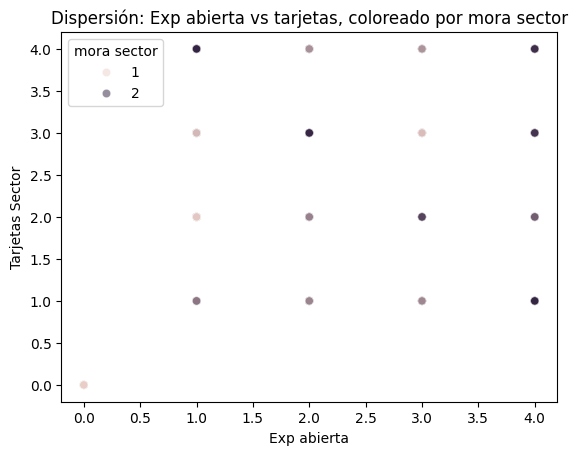

In [ ]:
## Dispersi√≥n
sns.scatterplot (x="Exp abierta",y="Tarjetas Sector",hue="mora sector",data=df,alpha=0.5)
plt.title("Dispersi√≥n: Exp abierta vs tarjetas, coloreado por mora sector")
plt.show()

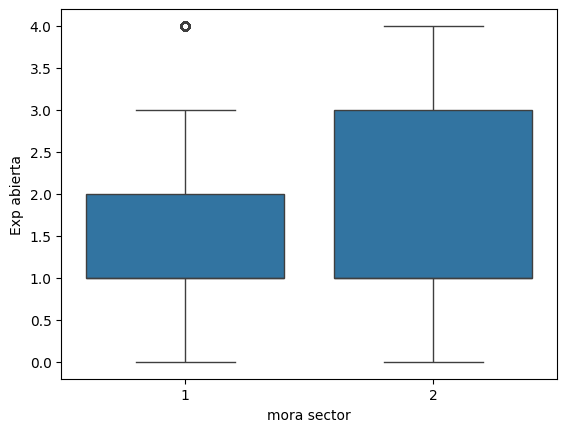

In [ ]:
## Caja y bigotes entre la experiencia y la mora

sns.boxplot(x='mora sector',y='Exp abierta',data=df)
plt.show()

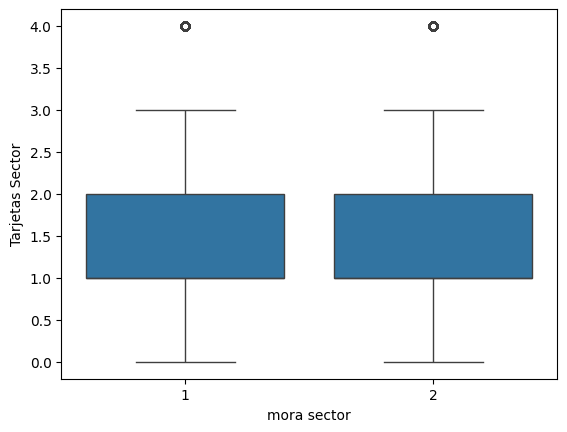

In [ ]:
## Gr√°fico de cajas entre tarjetas en el sector y la mora

sns.boxplot(x='mora sector',y='Tarjetas Sector',data=df)
plt.show()

In [ ]:
tabla = pd.crosstab(df["Exp abierta"],df["mora sector"])

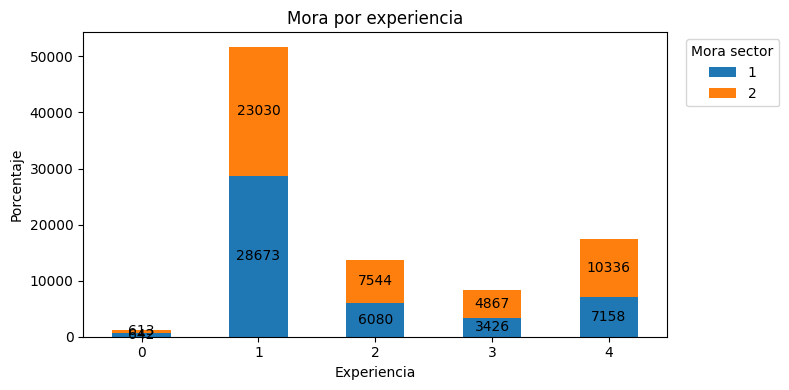

In [ ]:
## Gr√°fico de barras relacionando experiencia y mora

ax = tabla.plot(kind="bar", stacked=True,
                figsize=(8,4))
ax.set_title("Mora por experiencia")
ax.set_xlabel("Experiencia")
ax.set_ylabel("Porcentaje")
plt.xticks(rotation=0)
plt.legend(title="Mora sector", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()

# etiquetas centradas (opcional)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="center")
plt.show()

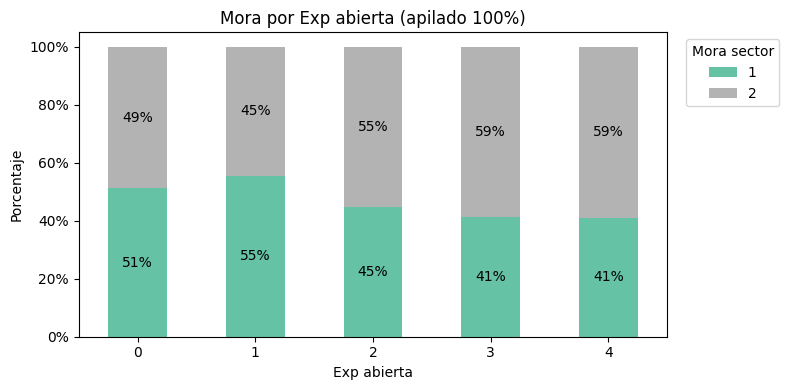

In [ ]:
## apilamos al 100% gr√°fico de barras entre experiencia y moras

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Crosstab (ejemplo Exp abierta vs Mora sector)
tabla = pd.crosstab(index=df["Exp abierta"], columns=df["mora sector"])

# Normalizar cada fila para que sume 1 (100%)
tabla_pct = tabla.div(tabla.sum(axis=1), axis=0)

# Gr√°fico apilado al 100%
ax = tabla_pct.plot(kind="bar", stacked=True, figsize=(8,4), colormap="Set2")
ax.set_title("Mora por Exp abierta (apilado 100%)")
ax.set_xlabel("Exp abierta")
ax.set_ylabel("Porcentaje")
ax.yaxis.set_major_formatter(PercentFormatter(1.0)) # mostrar eje Y en %

plt.xticks(rotation=0)
plt.legend(title="Mora sector", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()

# etiquetas de porcentaje (opcional)
for container in ax.containers:
    labels = [f"{v*100:.0f}%" if v>0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type="center")

plt.show()

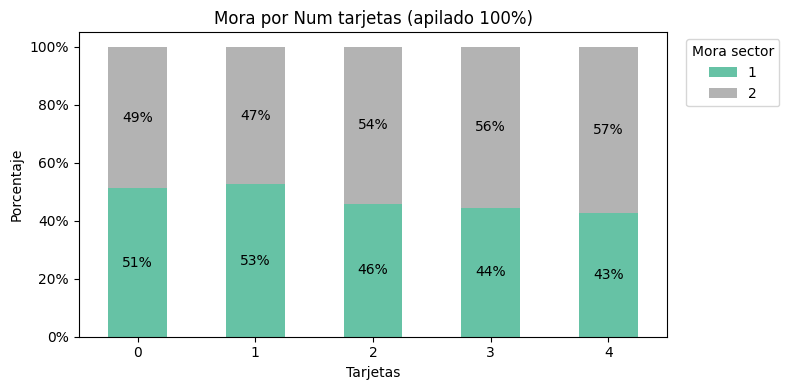

In [ ]:
## Gr√°fico de barras apilado, esta vez entre n√∫mero de tarjetas y mora

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Crosstab (ejemplo Exp abierta vs Mora sector)
tabla2 = pd.crosstab(index=df["Tarjetas Sector"], columns=df["mora sector"])

# Normalizar cada fila para que sume 1 (100%)
tabla_pct = tabla2.div(tabla2.sum(axis=1), axis=0)

# Gr√°fico apilado al 100%
ax = tabla_pct.plot(kind="bar", stacked=True, figsize=(8,4), colormap="Set2")
ax.set_title("Mora por Num tarjetas (apilado 100%)")
ax.set_xlabel("Tarjetas")
ax.set_ylabel("Porcentaje")
ax.yaxis.set_major_formatter(PercentFormatter(1.0)) # mostrar eje Y en %

plt.xticks(rotation=0)
plt.legend(title="Mora sector", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()

# etiquetas de porcentaje (opcional)
for container in ax.containers:
    labels = [f"{v*100:.0f}%" if v>0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type="center")

plt.show()

***Interpretaci√≥n de resultados***

Al generar la tabla de frecuencias cruzadas, podemos concluir que no hay evidencia suficiente para suponer que ante un mayor n√∫mero de tarjetas y mayor experiencia, los clientes se desempe√±en de mejor manera dado que para cada condici√≥n de mora, las participaciones no tienen una diferencia significativa.

Al generar la correlaci√≥n y el gr√°fico de dispersi√≥n, es evidente que las variables de experiencia y n√∫mero de tarjetas tiene una relaci√≥n, por lo que puedo estar cayendo en problemas de multicolinealidad. La morosidad aparece en todos los niveles, lo que indica que el desempe√±o de los clientes no solo depende de la experiencia y n√∫mero de tarjetas.

Al crear los gr√°ficos de cajas y bigotes, vemos una relaci√≥n diferencial entre experiencia y mora, fenomeno que no se da al revisar n√∫mero de tarjetas y mora. La conclusi√≥n que se puede sacar con estos gr√°ficos es contradictoria con la hipotesis dado que el gr√°fico nos dice que los clientes con menos experiencia predominan en buen desempe√±o.

Finalmente, en los gr√°ficos de barras apilados, enfrentamos las variables experienia y n√∫mero de tarjetas vs la mora del cliente. Para ambos casos encontramos un resultado similar. La conclusi√≥n de nuevo es contradictorio dado que nos indica que ante un mayor n√∫mero de tarjetas o una mayor experienia, el cliente tiene m√°s probabilidades de estar en mora.

***Conclusiones***

Podemos concluir que las variables seleccionadas no se comportan como esperabamos de acuerdo al conocimiento del dominio y en varios casos contradice nuestra hipotesis dado que clientes con mayor experiencia en el sistema, suelen desempe√±arse levemente peor que clientes con menor experiencia.

La recomendaci√≥n para el siguiente an√°lisis es trabajar el dataset con un modelo de regresi√≥n l√≥gistico dada la caracter√≠stica de la variable y (mora sector).

Se debe limpiar el dataset para eliminar o imputar en valores nulos y evitar p√©rdida de eficacia en la interpretaci√≥n de mis variables.